In [63]:
#
# Try to fit the magnetic data
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize

<hr>
Modified  By    Reason <br>
07-Jan-22 CBL   Original <br>
<hr>

In [96]:
def FindCenter(X0):
    # X the point value triplet
    # X0 the surmized center
    # The guess on radius
    # we want this value to be zero.
    val= np.power(Mx-X0[0],2)+np.power(My-X0[1],2)+np.power(Mz-X0[2],2)-np.power(X0[3],2)
    # normalize val
    val = val/Mx.size
    rc = abs(val.sum())
    #print("result = ", rc)
    return rc

In [89]:
# Import the CSV using pandas
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# In the file provided there are 1002 lines by 13 columns. 
# The data is organized by the way the names are assigned. 
#df = pd.read_csv("Mag2.CSV",names=['Index','Time','GX','GY','GZ','AX','AY','AZ','MX','MY','MZ','H','R','P'])
# Or I can format the file with Row 0 containing the names comma delimited and use a simpler read. 
# This data was taken using a 9DOF sensor from Sparkfun into an Arduino. 
# The sensor was slowly rotated several times. 
df = pd.read_csv("Mag2.CSV",dtype={'Index':np.int32,'Time':np.float64,
                                   'GX':np.float64,'GY':np.float64,'GZ':np.float64,
                                   'AZ':np.float64,'AY':np.float64,'AZ':np.float64,
                                   'MX':np.float64,'MY':np.float64,'MZ':np.float64,
                                   'H':np.float64,'R':np.float64,'P':np.float64})

M = np.matrix([df['MX'], df['MY'], df['MZ']])
Mx = np.array(df['MX'])     # Magnetic field X only
My = np.array(df['MY'])
Mz = np.array(df['MZ'])
#Ax = df['AX']     # Magnetic field X only
#Ay = df['AY']
#Az = df['AZ']

In [90]:
M

matrix([[ 0.     ,  0.     , -0.1351 , ...,  0.07644,  0.03262,  0.05586],
        [ 0.     ,  0.     ,  0.33026, ...,  0.01484, -0.01316,  0.00042],
        [ 0.     ,  0.     , -0.1624 , ..., -0.14588, -0.17976, -0.14238]])

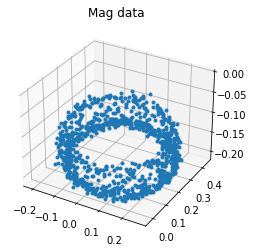

In [91]:
# Do a 3D plot of the data. 
# syntax for 3-D projection
plt.figure()
ax = plt.axes(projection ='3d')
#
# plotting
ax.plot3D(Mx,My,Mz,'.')
ax.set_title('Mag data')
plt.grid()
plt.show()

In [92]:
R = 0.2
X0 = [0,0,0, R]
val = FindCenter(X0)
val

AttributeError: module 'math' has no attribute 'abs'

In [100]:
# invoke a mimimization
res = minimize(FindCenter, X0, method='nelder-mead', options={'xatol': 1e-4, 'disp': True})
res

Optimization terminated successfully.
         Current function value: 0.000017
         Iterations: 43
         Function evaluations: 83


 final_simplex: (array([[-0.00146719,  0.00058253, -0.00218607,  0.3380842 ],
       [-0.00146944,  0.00058276, -0.00218405,  0.33801484],
       [-0.00143327,  0.00058022, -0.00218712,  0.33800671],
       [-0.00146869,  0.00058182, -0.00218464,  0.33800577],
       [-0.00147484,  0.00058666, -0.00218733,  0.3381182 ]]), array([1.73463499e-05, 3.02531421e-05, 3.32328398e-05, 3.65382986e-05,
       4.19253590e-05]))
           fun: 1.7346349860713865e-05
       message: 'Optimization terminated successfully.'
          nfev: 83
           nit: 43
        status: 0
       success: True
             x: array([-0.00146719,  0.00058253, -0.00218607,  0.3380842 ])